## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  33.765582  1509.546248  0.796105  3.704784  1.636487
1  48.114458  1700.740037  0.018145  7.614128  0.574700
2  17.133115  1228.433025  0.838126  6.059457  1.617979
3  57.266771   761.078457  0.595843  9.068316  1.437819
4  11.726293   554.142241  0.760855  3.618307  1.402978


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9045699	total: 58.1ms	remaining: 58s
1:	learn: 0.8961672	total: 58.7ms	remaining: 29.3s
2:	learn: 0.8899042	total: 59.2ms	remaining: 19.7s
3:	learn: 0.8804089	total: 59.7ms	remaining: 14.9s
4:	learn: 0.8719245	total: 60.5ms	remaining: 12s
5:	learn: 0.8642596	total: 61ms	remaining: 10.1s
6:	learn: 0.8578041	total: 61.3ms	remaining: 8.7s
7:	learn: 0.8513126	total: 61.8ms	remaining: 7.67s
8:	learn: 0.8432738	total: 62.3ms	remaining: 6.86s
9:	learn: 0.8356952	total: 62.9ms	remaining: 6.22s
10:	learn: 0.8277976	total: 63.3ms	remaining: 5.69s
11:	learn: 0.8207830	total: 63.8ms	remaining: 5.25s
12:	learn: 0.8122015	total: 64.3ms	remaining: 4.88s
13:	learn: 0.8048954	total: 64.5ms	remaining: 4.54s
14:	learn: 0.7997060	total: 65ms	remaining: 4.27s
15:	learn: 0.7951175	total: 65.6ms	remaining: 4.03s
16:	learn: 0.7888014	total: 66.4ms	remaining: 3.84s
17:	learn: 0.7830290	total: 66.8ms	remaining: 3.65s
18:	learn: 0.7757239	total: 67.3ms	remaining: 3.48s
1

91:	learn: 0.4435931	total: 105ms	remaining: 1.03s
92:	learn: 0.4412785	total: 106ms	remaining: 1.03s
93:	learn: 0.4384128	total: 106ms	remaining: 1.02s
94:	learn: 0.4346955	total: 107ms	remaining: 1.02s
95:	learn: 0.4319922	total: 107ms	remaining: 1.01s
96:	learn: 0.4290713	total: 108ms	remaining: 1s
97:	learn: 0.4256920	total: 108ms	remaining: 996ms
98:	learn: 0.4235219	total: 109ms	remaining: 990ms
99:	learn: 0.4207470	total: 109ms	remaining: 984ms
100:	learn: 0.4178871	total: 110ms	remaining: 977ms
101:	learn: 0.4157164	total: 110ms	remaining: 969ms
102:	learn: 0.4134218	total: 110ms	remaining: 961ms
103:	learn: 0.4102921	total: 111ms	remaining: 954ms
104:	learn: 0.4076198	total: 111ms	remaining: 949ms
105:	learn: 0.4050881	total: 112ms	remaining: 944ms
106:	learn: 0.4026953	total: 112ms	remaining: 938ms
107:	learn: 0.4004287	total: 113ms	remaining: 932ms
108:	learn: 0.3974452	total: 113ms	remaining: 925ms
109:	learn: 0.3952360	total: 113ms	remaining: 918ms
110:	learn: 0.3924027	to

258:	learn: 0.1879161	total: 186ms	remaining: 531ms
259:	learn: 0.1872054	total: 186ms	remaining: 530ms
260:	learn: 0.1863350	total: 187ms	remaining: 529ms
261:	learn: 0.1858308	total: 187ms	remaining: 527ms
262:	learn: 0.1852198	total: 188ms	remaining: 526ms
263:	learn: 0.1844723	total: 188ms	remaining: 524ms
264:	learn: 0.1835464	total: 188ms	remaining: 522ms
265:	learn: 0.1828155	total: 189ms	remaining: 521ms
266:	learn: 0.1821427	total: 189ms	remaining: 519ms
267:	learn: 0.1816591	total: 190ms	remaining: 518ms
268:	learn: 0.1812418	total: 190ms	remaining: 517ms
269:	learn: 0.1806218	total: 191ms	remaining: 515ms
270:	learn: 0.1801743	total: 191ms	remaining: 514ms
271:	learn: 0.1796774	total: 192ms	remaining: 513ms
272:	learn: 0.1790947	total: 192ms	remaining: 512ms
273:	learn: 0.1786237	total: 193ms	remaining: 510ms
274:	learn: 0.1777349	total: 193ms	remaining: 509ms
275:	learn: 0.1771415	total: 193ms	remaining: 507ms
276:	learn: 0.1765444	total: 194ms	remaining: 506ms
277:	learn: 

346:	learn: 0.1358453	total: 226ms	remaining: 425ms
347:	learn: 0.1355416	total: 227ms	remaining: 425ms
348:	learn: 0.1348296	total: 228ms	remaining: 424ms
349:	learn: 0.1345067	total: 229ms	remaining: 425ms
350:	learn: 0.1338565	total: 231ms	remaining: 427ms
351:	learn: 0.1332287	total: 233ms	remaining: 429ms
352:	learn: 0.1329296	total: 234ms	remaining: 430ms
353:	learn: 0.1326581	total: 236ms	remaining: 430ms
354:	learn: 0.1319986	total: 237ms	remaining: 431ms
355:	learn: 0.1317071	total: 238ms	remaining: 430ms
356:	learn: 0.1310595	total: 239ms	remaining: 431ms
357:	learn: 0.1307559	total: 240ms	remaining: 431ms
358:	learn: 0.1301289	total: 241ms	remaining: 430ms
359:	learn: 0.1295349	total: 241ms	remaining: 428ms
360:	learn: 0.1289022	total: 241ms	remaining: 427ms
361:	learn: 0.1282807	total: 242ms	remaining: 426ms
362:	learn: 0.1278832	total: 242ms	remaining: 425ms
363:	learn: 0.1273309	total: 242ms	remaining: 423ms
364:	learn: 0.1270563	total: 243ms	remaining: 422ms
365:	learn: 

413:	learn: 0.1075380	total: 303ms	remaining: 428ms
414:	learn: 0.1071614	total: 303ms	remaining: 427ms
415:	learn: 0.1069037	total: 303ms	remaining: 426ms
416:	learn: 0.1064653	total: 304ms	remaining: 425ms
417:	learn: 0.1058835	total: 304ms	remaining: 424ms
418:	learn: 0.1055194	total: 305ms	remaining: 423ms
419:	learn: 0.1052709	total: 305ms	remaining: 422ms
420:	learn: 0.1049120	total: 306ms	remaining: 420ms
421:	learn: 0.1048006	total: 306ms	remaining: 419ms
422:	learn: 0.1046908	total: 307ms	remaining: 418ms
423:	learn: 0.1045825	total: 307ms	remaining: 417ms
424:	learn: 0.1044758	total: 308ms	remaining: 416ms
425:	learn: 0.1041004	total: 308ms	remaining: 415ms
426:	learn: 0.1037976	total: 309ms	remaining: 414ms
427:	learn: 0.1036933	total: 309ms	remaining: 413ms
428:	learn: 0.1035905	total: 309ms	remaining: 412ms
429:	learn: 0.1034891	total: 310ms	remaining: 411ms
430:	learn: 0.1031476	total: 310ms	remaining: 410ms
431:	learn: 0.1030483	total: 311ms	remaining: 409ms
432:	learn: 

576:	learn: 0.0717657	total: 396ms	remaining: 290ms
577:	learn: 0.0715301	total: 396ms	remaining: 289ms
578:	learn: 0.0714187	total: 397ms	remaining: 288ms
579:	learn: 0.0713182	total: 397ms	remaining: 288ms
580:	learn: 0.0712088	total: 398ms	remaining: 287ms
581:	learn: 0.0710500	total: 398ms	remaining: 286ms
582:	learn: 0.0709510	total: 399ms	remaining: 285ms
583:	learn: 0.0707418	total: 399ms	remaining: 284ms
584:	learn: 0.0704052	total: 400ms	remaining: 283ms
585:	learn: 0.0701776	total: 400ms	remaining: 283ms
586:	learn: 0.0700716	total: 400ms	remaining: 282ms
587:	learn: 0.0699171	total: 401ms	remaining: 281ms
588:	learn: 0.0696944	total: 401ms	remaining: 280ms
589:	learn: 0.0694714	total: 402ms	remaining: 279ms
590:	learn: 0.0693185	total: 402ms	remaining: 278ms
591:	learn: 0.0691121	total: 402ms	remaining: 277ms
592:	learn: 0.0689096	total: 403ms	remaining: 277ms
593:	learn: 0.0688133	total: 403ms	remaining: 276ms
594:	learn: 0.0686260	total: 404ms	remaining: 275ms
595:	learn: 

771:	learn: 0.0461500	total: 485ms	remaining: 143ms
772:	learn: 0.0461068	total: 485ms	remaining: 143ms
773:	learn: 0.0460666	total: 486ms	remaining: 142ms
774:	learn: 0.0459736	total: 486ms	remaining: 141ms
775:	learn: 0.0458613	total: 487ms	remaining: 140ms
776:	learn: 0.0456834	total: 487ms	remaining: 140ms
777:	learn: 0.0456285	total: 488ms	remaining: 139ms
778:	learn: 0.0454721	total: 489ms	remaining: 139ms
779:	learn: 0.0452605	total: 489ms	remaining: 138ms
780:	learn: 0.0450527	total: 489ms	remaining: 137ms
781:	learn: 0.0448807	total: 490ms	remaining: 137ms
782:	learn: 0.0448189	total: 490ms	remaining: 136ms
783:	learn: 0.0447298	total: 491ms	remaining: 135ms
784:	learn: 0.0446213	total: 491ms	remaining: 135ms
785:	learn: 0.0444498	total: 492ms	remaining: 134ms
786:	learn: 0.0444109	total: 492ms	remaining: 133ms
787:	learn: 0.0443508	total: 493ms	remaining: 133ms
788:	learn: 0.0443123	total: 493ms	remaining: 132ms
789:	learn: 0.0441103	total: 493ms	remaining: 131ms
790:	learn: 

926:	learn: 0.0323666	total: 561ms	remaining: 44.2ms
927:	learn: 0.0322603	total: 561ms	remaining: 43.6ms
928:	learn: 0.0322214	total: 562ms	remaining: 42.9ms
929:	learn: 0.0321521	total: 562ms	remaining: 42.3ms
930:	learn: 0.0321141	total: 563ms	remaining: 41.7ms
931:	learn: 0.0320459	total: 563ms	remaining: 41.1ms
932:	learn: 0.0319787	total: 564ms	remaining: 40.5ms
933:	learn: 0.0318533	total: 564ms	remaining: 39.9ms
934:	learn: 0.0317703	total: 565ms	remaining: 39.3ms
935:	learn: 0.0316926	total: 565ms	remaining: 38.6ms
936:	learn: 0.0316264	total: 565ms	remaining: 38ms
937:	learn: 0.0315477	total: 566ms	remaining: 37.4ms
938:	learn: 0.0314827	total: 566ms	remaining: 36.8ms
939:	learn: 0.0314461	total: 567ms	remaining: 36.2ms
940:	learn: 0.0313928	total: 568ms	remaining: 35.6ms
941:	learn: 0.0313147	total: 568ms	remaining: 35ms
942:	learn: 0.0311983	total: 568ms	remaining: 34.4ms
943:	learn: 0.0311105	total: 569ms	remaining: 33.8ms
944:	learn: 0.0310357	total: 569ms	remaining: 33.1

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

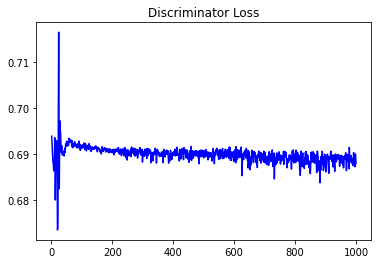

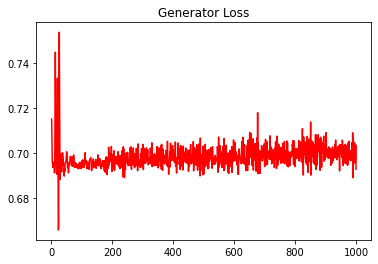

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.36534032334921657


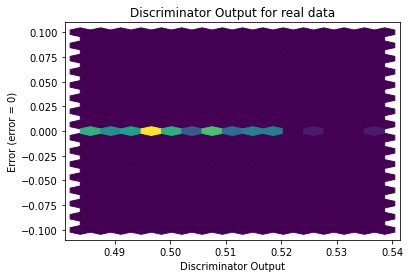

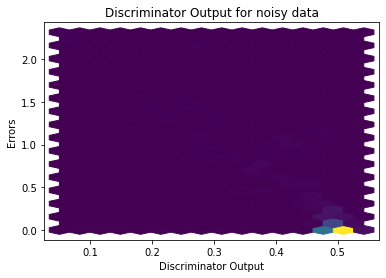

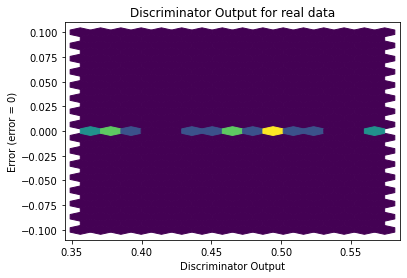

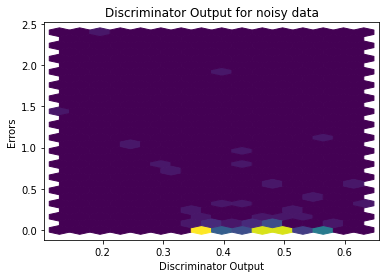

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


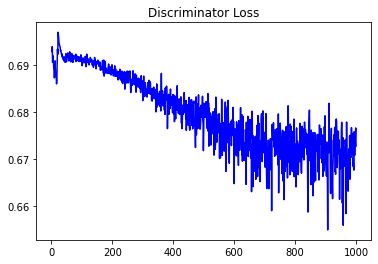

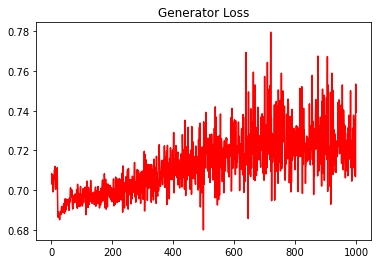

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.25974362453960215


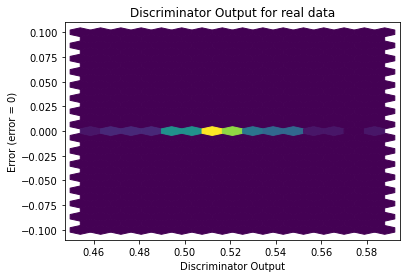

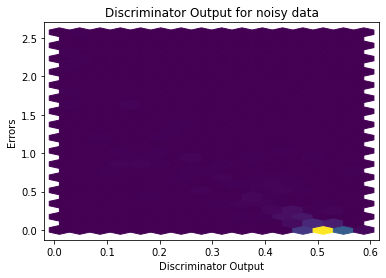

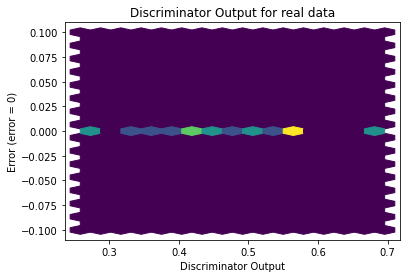

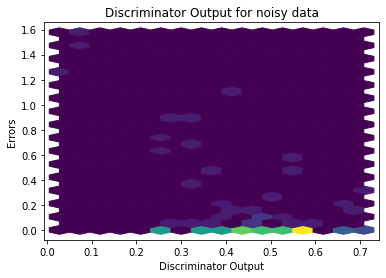

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1549]], requires_grad=True)
